In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv('adult_train.csv')

In [129]:
data

,age,Unnamed: 1,education,education-num,race,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,77516,Bachelors,13,White,2174,0,40,United-States,<=50K
1,50,83311,Bachelors,13,White,0,0,13,United-States,<=50K
2,38,215646,HS-grad,9,White,0,0,40,United-States,<=50K
3,53,234721,11th,7,Black,0,0,40,United-States,<=50K
4,28,338409,Bachelors,13,Black,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,White,0,0,38,United-States,<=50K
32557,40,154374,HS-grad,9,White,0,0,40,United-States,>50K
32558,58,151910,HS-grad,9,White,0,0,40,United-States,<=50K
32559,22,201490,HS-grad,9,White,0,0,20,United-States,<=50K


In [130]:
data.drop(columns=['education','race','native-country','Unnamed: 1'], inplace=True)

In [131]:
data

,age,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K
...,...,...,...,...,...,...
32556,27,12,0,0,38,<=50K
32557,40,9,0,0,40,>50K
32558,58,9,0,0,40,<=50K
32559,22,9,0,0,20,<=50K


In [132]:
data.dropna(inplace=True)

In [133]:
X = data.drop(columns=['Income'])
y = data['Income']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model = LogisticRegression()

In [136]:
model.fit(X_train, y_train)



LogisticRegression()

In [137]:
predictions = model.predict(X_test)

In [138]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8157531091662829


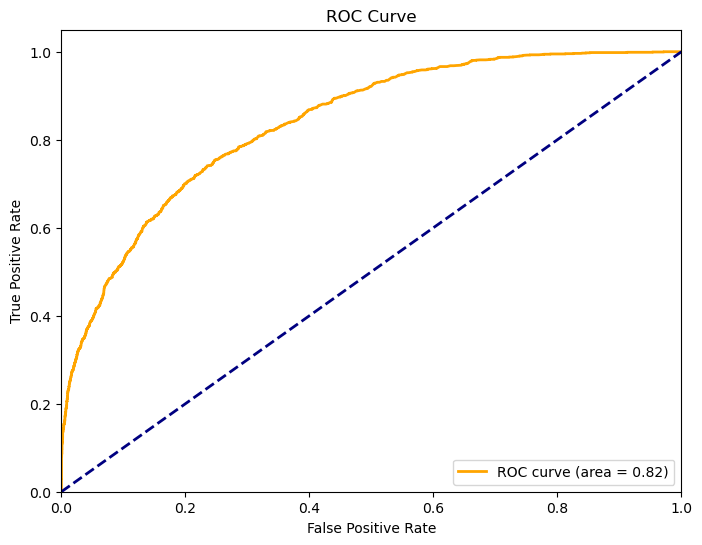

In [150]:
y_test_numeric = y_test.replace({' <=50K': 0, ' >50K': 1})

fpr, tpr, thresholds = roc_curve(y_test_numeric, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
